Get libraries

In [30]:
import numpy as np
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA


Creating data using skearn make_blobs procedure. 

The data is clustered around centers.

In [62]:
centers_ = [(2, 2, 2, 2, 2), (7, 7, 7, 7, 7), (12, 12, 12, 12, 12), (15,15,15,15,15)]

X, y = make_blobs(n_samples=[1, 7, 6, 1], centers=centers_, n_features=5, cluster_std= [0.25, 0.75, 0.75, 0.25], random_state=42)

In [63]:
scaler = MinMaxScaler()

X_norm = scaler.fit(X).transform(X)


In [64]:
X_norm

array([[0.36249861, 0.46344294, 0.42198166, 0.32797882, 0.44063477],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.78040656, 0.72626125, 0.72728179, 0.77461086, 0.87327761],
       [0.84010939, 0.74375904, 0.82552244, 0.76019699, 0.77192887],
       [0.3054247 , 0.38685332, 0.26255308, 0.27847737, 0.41973164],
       [0.38245783, 0.3108501 , 0.39908044, 0.3204177 , 0.39019053],
       [0.80437563, 0.7573616 , 0.76009427, 0.72199258, 0.72153612],
       [0.46081903, 0.36256104, 0.3810646 , 0.27291094, 0.37491136],
       [0.34351745, 0.31857208, 0.39548799, 0.30269811, 0.32243138],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.34123734, 0.47870473, 0.37632779, 0.29406923, 0.45756442],
       [0.34923636, 0.3491499 , 0.39126215, 0.24474893, 0.30352876],
       [0.73394383, 0.73740714, 0.70217799, 0.67039332, 0.86006731],
       [0.81552851, 0.70087937, 0.74877837, 0.75844613, 0.86992449],
       [0.7200228 , 0.72203836, 0.

In [65]:
kmeans = KMeans(n_clusters=4, init = 'k-means++', random_state=42).fit(X_norm)
kmeans.inertia_

0.1460989093233103

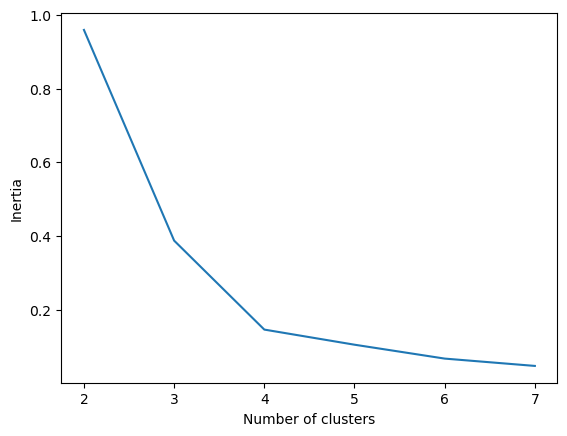

In [66]:
inertia_list = [] 
for i in range(2, 8): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42).fit(X_norm) 
    inertia_list.append(kmeans.inertia_)
    

plt.plot(range(2, 8), inertia_list)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') 
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7403670553320824
For n_clusters = 3 The average silhouette_score is : 0.7206997350152587
For n_clusters = 4 The average silhouette_score is : 0.6593315034576238
For n_clusters = 5 The average silhouette_score is : 0.45143767494880105
For n_clusters = 6 The average silhouette_score is : 0.3219934507185497


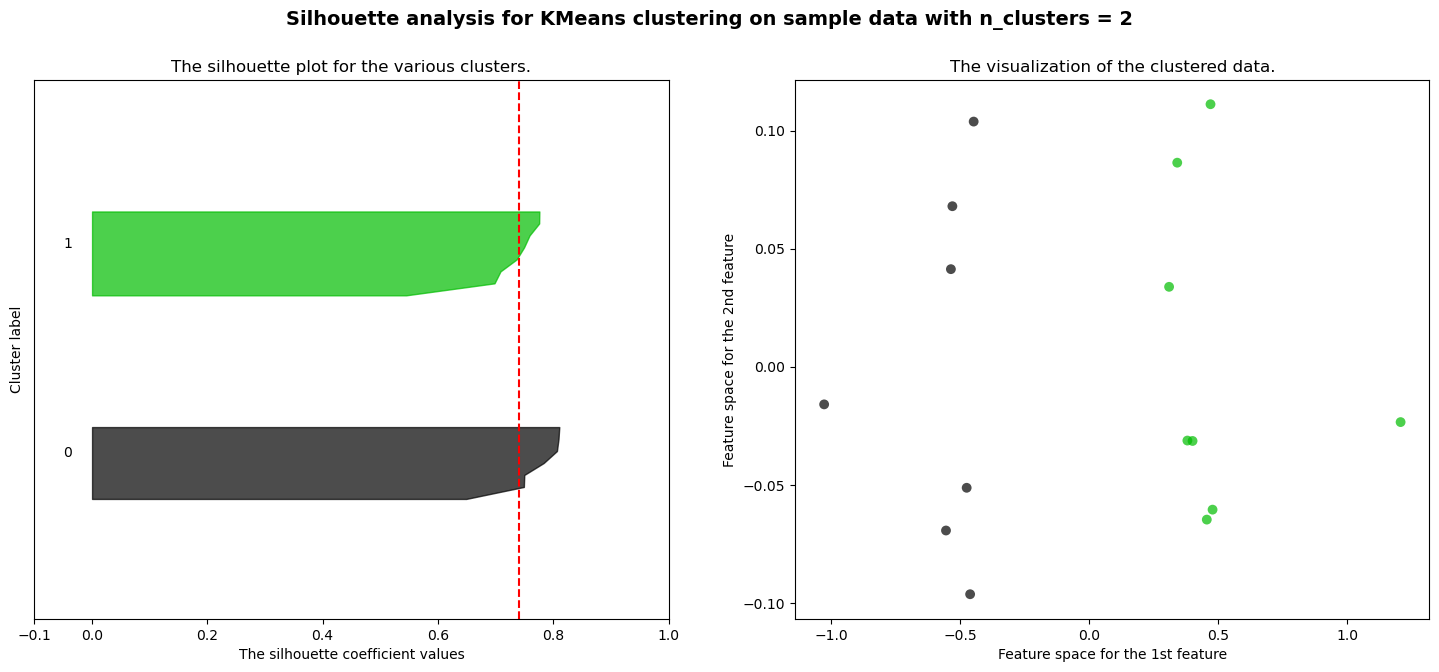

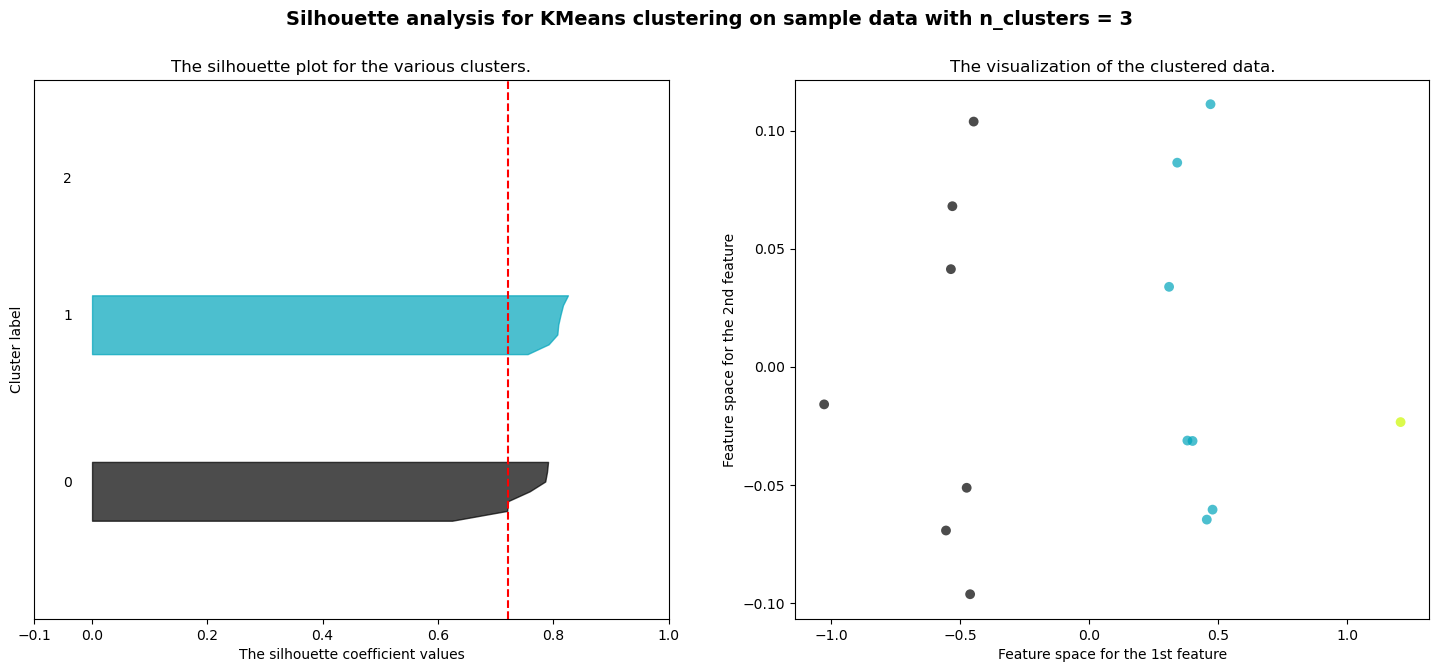

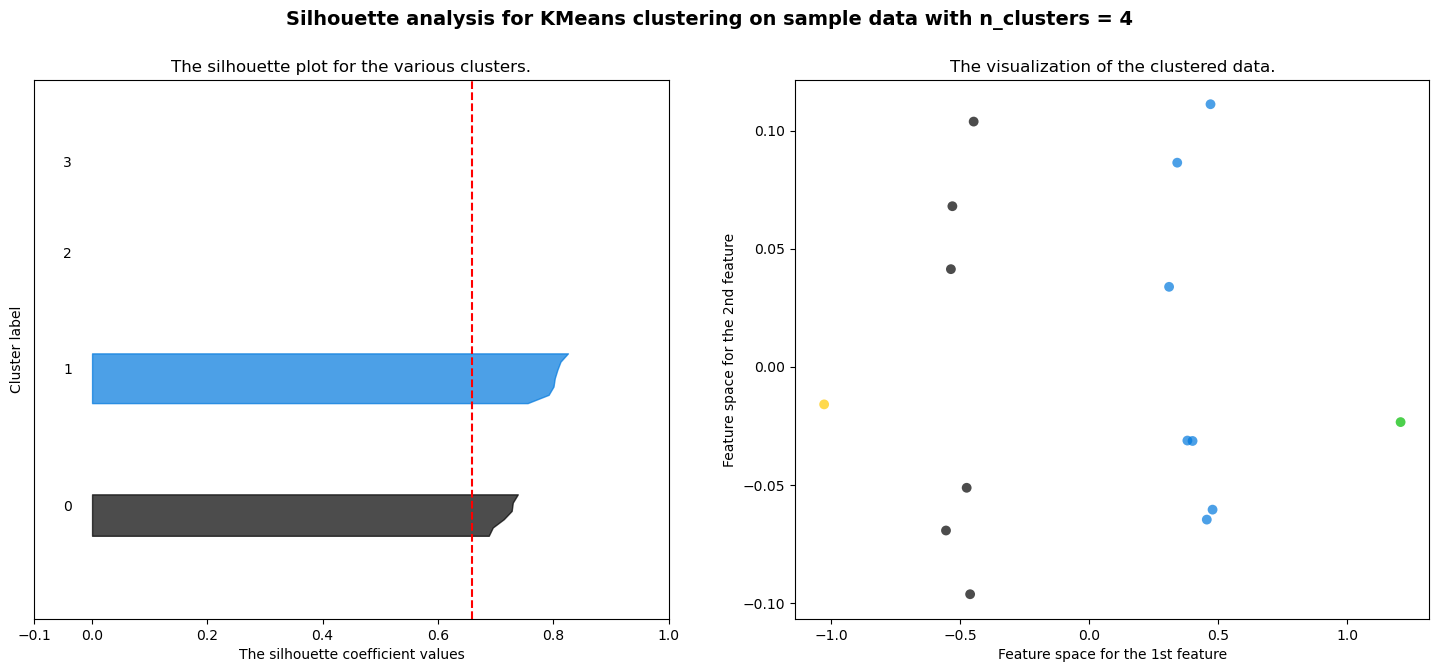

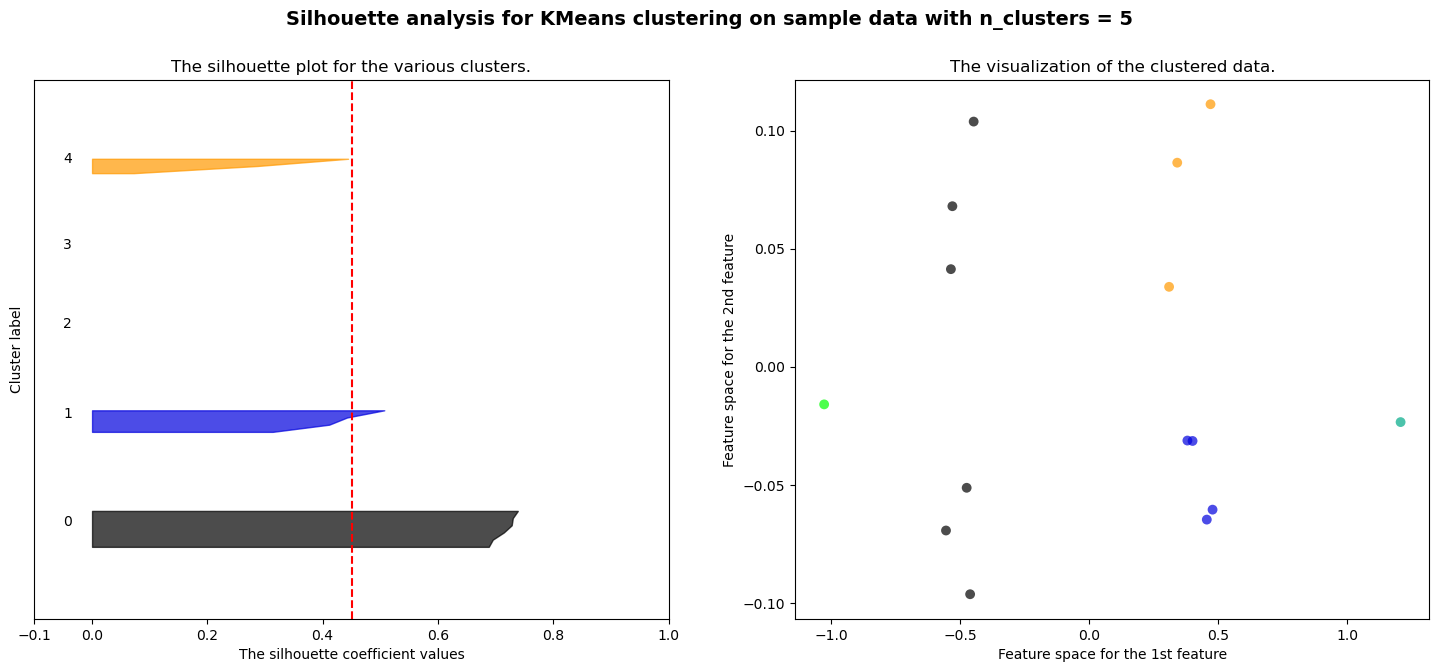

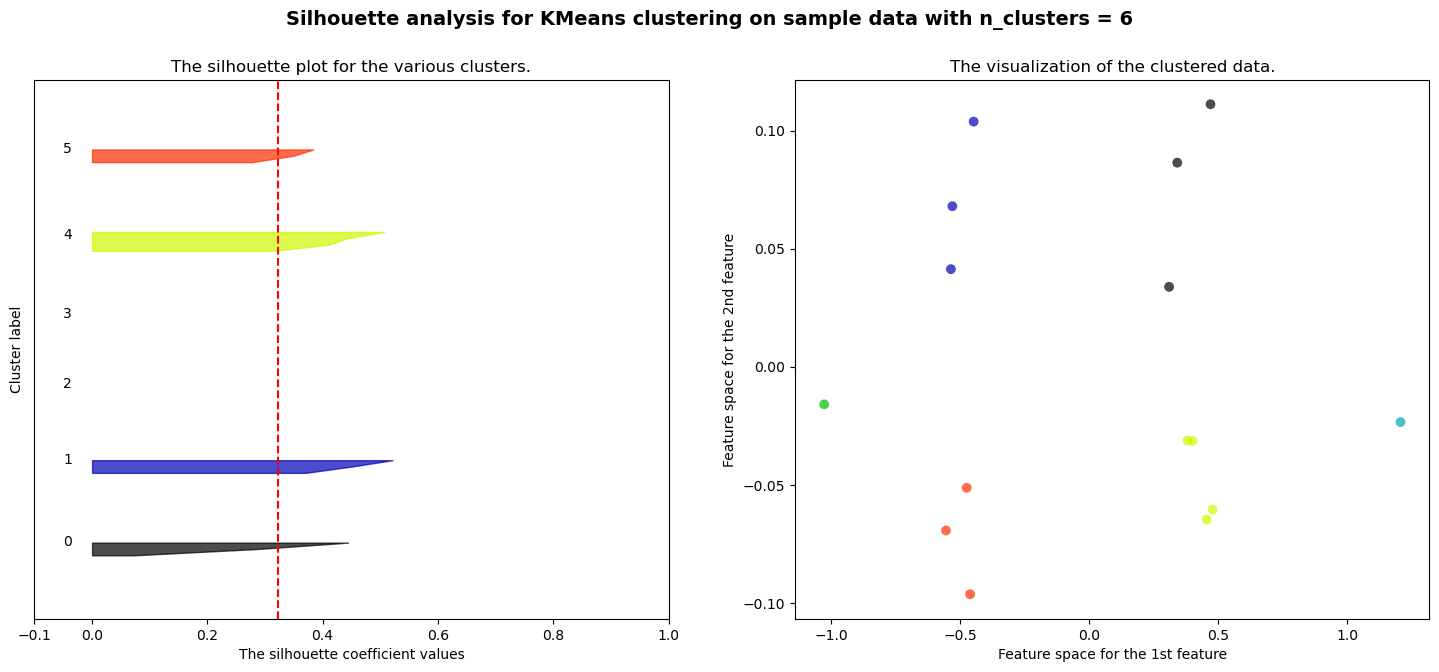

In [67]:
range_n_clusters = [2, 3, 4, 5,6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=20)
    cluster_labels = kmeans.fit_predict(X_norm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_norm, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_norm, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

    pca = PCA(2)
    data = pca.fit_transform(X_norm)
    ax2.scatter(
        data[:, 0], data[:, 1], marker=".", s=200, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    '''
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=100,
        edgecolor="k",
    )
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
    '''
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [68]:
m, n = X.shape
X

array([[ 6.82439728,  8.18440961,  7.57557605,  6.64789421,  7.40692003],
       [15.0903489 , 15.38450914, 14.99104349, 15.39116091, 14.34506372],
       [12.24306298, 11.71118829, 11.4923085 , 12.45875722, 12.77324964],
       [13.01718002, 11.94599241, 12.75264967, 12.27122702, 11.51616018],
       [ 6.08436726,  7.1566477 ,  5.53024741,  6.00386046,  7.14764593],
       [ 7.08319194,  6.13675482,  7.28177351,  6.54952098,  6.78122969],
       [12.55384993, 12.12852621, 11.91326379, 11.77417223, 10.89110851],
       [ 8.09923658,  6.83066777,  7.05064615,  5.93143886,  6.59171296],
       [ 6.57828435,  6.24037666,  7.2356855 ,  6.31898194,  5.94077222],
       [ 2.12417854,  1.96543392,  2.16192213,  2.38075746,  1.94146166],
       [ 6.54872004,  8.38920864,  6.98987708,  6.2067168 ,  7.61690868],
       [ 6.65243673,  6.65070268,  7.1814717 ,  5.56503982,  5.70631163],
       [11.64061932, 11.86075577, 11.17024877, 11.10284503, 12.60939437],
       [12.69846009, 11.37058686, 11.7

In [69]:
#print the decision matrix
A = pd.DataFrame(X, columns = ['$g_' + str(i+1) + '$' for i in range (X.shape[1])], index= ['$a_' + str(i+1) + '$' for i in range (X.shape[0])])
A

,$g_1$,$g_2$,$g_3$,$g_4$,$g_5$
$a_1$,6.824397,8.184410,7.575576,6.647894,7.406920
$a_2$,15.090349,15.384509,14.991043,15.391161,14.345064
$a_3$,12.243063,11.711188,11.492308,12.458757,12.773250
$a_4$,13.017180,11.945992,12.752650,12.271227,11.516160
$a_5$,6.084367,7.156648,5.530247,6.003860,7.147646
$a_6$,7.083192,6.136755,7.281774,6.549521,6.781230
$a_7$,12.553850,12.128526,11.913264,11.774172,10.891109
$a_8$,8.099237,6.830668,7.050646,5.931439,6.591713
$a_9$,6.578284,6.240377,7.235685,6.318982,5.940772
$a_10$,2.124179,1.965434,2.161922,2.380757,1.941462


Lets first run a basic PROMETHEE II using:

- equal weights
- $q_j$ = 1.5
- $p_j$ = 3.5
- preference function type 5

In [73]:
%load_ext autoreload
%autoreload 2
from PROMETHEE import PROMETHEE_2, optimize_PROM2_original, optimize_newconstraint, optimize_PROM2_original_positive_beta
from sklearn.preprocessing import StandardScaler 

In [74]:
#solve the problem with PROMETHEE II
net_flows_toy = PROMETHEE_2 (X, [1.5 for i in range (n)], [3.5 for i in range (n)], [0 for i in range (n)], [1/n for i in range (n)], [5 for i in range (n)])[1]
net_flows_toy = pd.DataFrame(net_flows_toy, index = A.index, columns=["$\phi$"])

In [75]:
net_flows_toy["Position"] = net_flows_toy.rank(ascending=False)
net_flows_toy

,$\phi$,Position
$a_1$,-0.411714,9.0
$a_2$,0.887581,1.0
$a_3$,0.528210,2.0
$a_4$,0.528147,3.0
$a_5$,-0.441575,14.0
$a_6$,-0.436061,12.0
$a_7$,0.503523,6.0
$a_8$,-0.423662,10.0
$a_9$,-0.436318,13.0
$a_10$,-0.996804,15.0


In [76]:
pgrn = np.random.RandomState(0) # create a random number generator with a fixed seed

n_simulations = 10000 # number of simulations
W = np.zeros(shape = (n, n_simulations)) # weight matrix
P = np.zeros(shape = (n, n_simulations)) # preference threshold matrix
Q = np.zeros(shape = (n, n_simulations)) # indifference threshold matrix

Net_Flows = np.zeros(shape = (m, n_simulations)) # matrix that will receive the PROMETHEE II net flows
Pos_Flows = np.zeros(shape = (m, n_simulations))
Neg_Flows = np.zeros(shape = (m, n_simulations))
results = [[] for s in range (n_simulations)]


s_curve = [0 for j in range (n)] # it will not be used 
pref = [5 for j in range (n)] # We will always use pref. function 5

for s in range (n_simulations):
    W [:,s] = pgrn.dirichlet(np.ones(n),size=1).reshape(n) # weights come from a dirichlet distribution
    Q [:,s] = pgrn.uniform (1,2, n) # q_j between 1 and 2
    P [:,s] = pgrn.uniform (3, 4, n) # p_j between 3 and 4
    results[s], Net_Flows[:,s], Pos_Flows[:,s], Neg_Flows[:,s] = PROMETHEE_2 (X, Q[:,s], P[:,s], s_curve, W[:,s], pref)
    print (f'simulation {s+1} completed')

simulation 1 completed
simulation 2 completed
simulation 3 completed
simulation 4 completed
simulation 5 completed
simulation 6 completed
simulation 7 completed
simulation 8 completed
simulation 9 completed
simulation 10 completed
simulation 11 completed
simulation 12 completed
simulation 13 completed
simulation 14 completed
simulation 15 completed
simulation 16 completed
simulation 17 completed
simulation 18 completed
simulation 19 completed
simulation 20 completed
simulation 21 completed
simulation 22 completed
simulation 23 completed
simulation 24 completed
simulation 25 completed
simulation 26 completed
simulation 27 completed
simulation 28 completed
simulation 29 completed
simulation 30 completed
simulation 31 completed
simulation 32 completed
simulation 33 completed
simulation 34 completed
simulation 35 completed
simulation 36 completed
simulation 37 completed
simulation 38 completed
simulation 39 completed
simulation 40 completed
simulation 41 completed
simulation 42 completed
s

Lets calculate the $\mu$ and $\sigma$ of the net flows

In [77]:
pd.DataFrame(W).to_csv("simulation_results_toy/W.csv")
pd.DataFrame(Q).to_csv("simulation_results_toy/Q.csv")
pd.DataFrame(P).to_csv("simulation_results_toy/P.csv")
pd.DataFrame(Net_Flows).to_csv("simulation_results_toy/Net_Flows.csv")
pd.DataFrame(Pos_Flows).to_csv("simulation_results_toy/Pos_Flows.csv")
pd.DataFrame(Neg_Flows).to_csv("simulation_results_toy/Neg_Flows.csv")
pd.concat(results, axis = 1).to_csv("simulation_results_toy/results.csv")

In [78]:
Net_Flows = pd.read_csv("simulation_results_toy/Neg_Flows.csv", index_col=0)
Net_Flows = np.array(Net_Flows)

In [79]:
mu_net = np.mean(Net_Flows, axis=1)
sigma_net = np.std(Net_Flows, axis=1)

#Construindo um DataFrame dos resultados
Sigma_Mu_df = pd.DataFrame({"Sigma": sigma_net,"Mu": mu_net}, index= ['a_' + str(i+1) for i in range (m)])
Sigma_Mu_df


,Sigma,Mu
a_1,0.007268,0.492962
a_2,0.000000,0.000000
a_3,0.010431,0.049146
a_4,0.008850,0.044029
a_5,0.013446,0.513127
a_6,0.008256,0.508837
a_7,0.011182,0.065027
a_8,0.004051,0.499404
a_9,0.007765,0.510462
a_10,0.005314,0.995148


Before plotting the results, lets procceed with a standard normalization.

In [80]:
Sigma_Mu_df_transformed = StandardScaler().fit_transform(Sigma_Mu_df)
Sigma_Mu_df_transformed = pd.DataFrame(Sigma_Mu_df_transformed, columns=['Sigma', 'Mu'], index = ['a_' + str(i+1) for i in range (m)])
Sigma_Mu_df_transformed

,Sigma,Mu
a_1,-0.427072,0.596412
a_2,-2.369101,-1.137719
a_3,0.418096,-0.964835
a_4,-0.004510,-0.982835
a_5,1.223726,0.667347
a_6,-0.163226,0.652254
a_7,0.618779,-0.908971
a_8,-1.286604,0.619073
a_9,-0.294362,0.657972
a_10,-0.949188,2.362988


Plot the $\sigma-\mu$ figure 

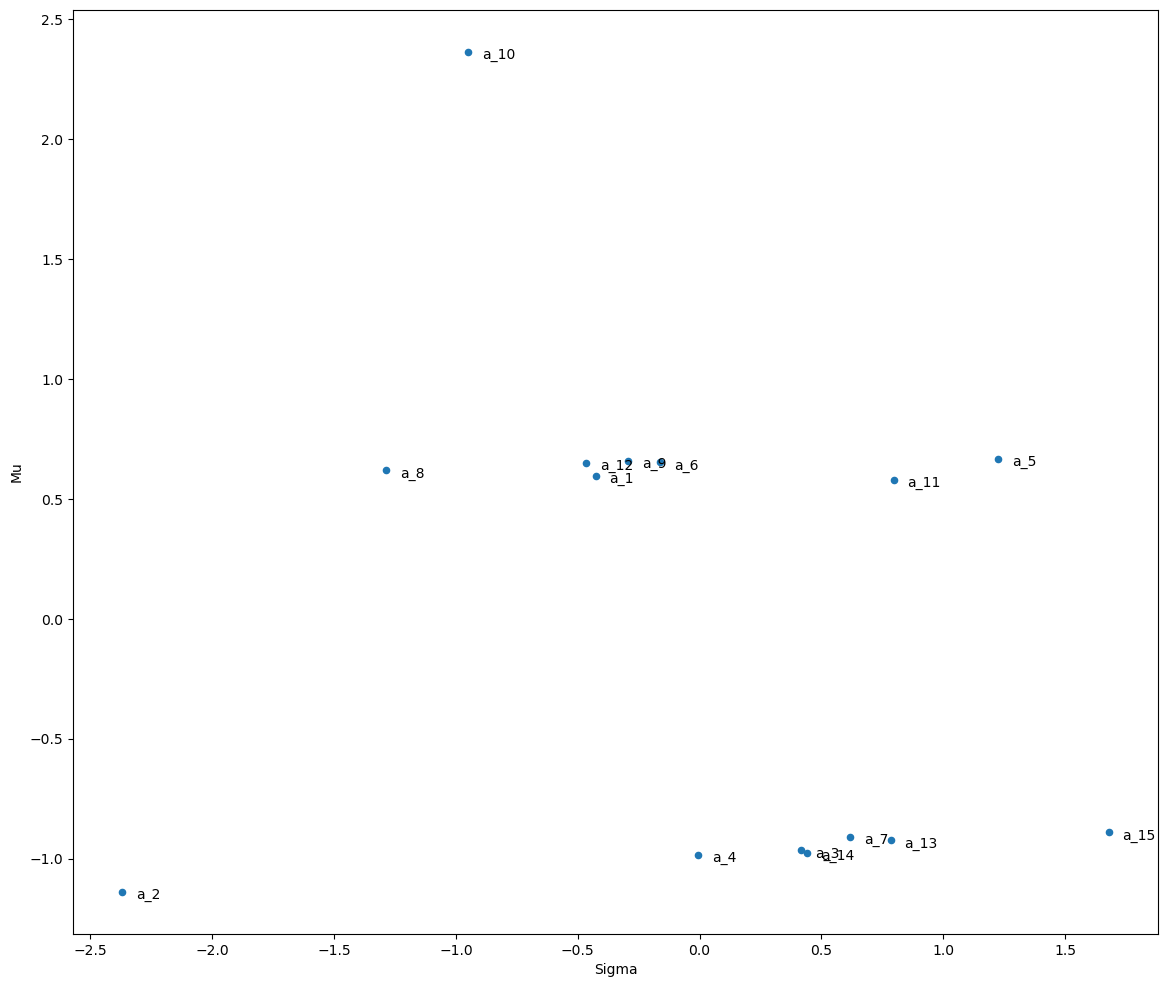

In [81]:
from matplotlib.pyplot import cm
fig, ax = plt.subplots()
cmap = cm.get_cmap('Spectral')
Sigma_Mu_df_transformed.plot('Sigma', 'Mu', kind='scatter', ax=ax, figsize = (14,12))
for k, v in Sigma_Mu_df_transformed.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=10, color='black')
for k, v in Sigma_Mu_df_transformed.iterrows():
    if (k=='North Korea'):
        plt.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=8, color='red')

### Get PKFs

Now, get the Pareto-Koopmans frontiers

In [82]:
df =Sigma_Mu_df.copy()
PKF=[]
count=0
while df.shape[0]>0:
    PKF.append([])
    for idx in df.index:
        comp_df = df.copy()
        comp_df.drop(index = idx)
        if any([any([
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])), # loose in both dimensions
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1])), # loose in first dimension and drow in second
                ((df.loc[idx][0] == comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])) # loose in the second dimension 
                    ]) for i in range (comp_df.shape[0])]
                ) == False:
            PKF[count].append(idx)
    
    if len(PKF[count]) == 0:
        PKF[count].append(df.index)
        break
    else:
        df = df.drop(index=PKF[count])
        print(f'PKF_{str(count+1)}: {PKF[count]}')
        count+=1

PKF_1: ['a_2', 'a_8', 'a_10']
PKF_2: ['a_5', 'a_9', 'a_12']
PKF_3: ['a_1', 'a_6']
PKF_4: ['a_3', 'a_4', 'a_7', 'a_11']
PKF_5: ['a_13', 'a_14', 'a_15']


### Run the optimization model

Get the local efficiencies

In [83]:
lambda_ = 0

# Run optimization and get the local efficiences
m = Sigma_Mu_df.shape[0] # number of alternatives
m_f = len(PKF) # number of frontiers
local_ef = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
local_ef_new = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
for unit in range (m):
    for fr in range (m_f):
        unit_sigmamu = np.array([Sigma_Mu_df.iloc[unit]]) # get the alternative unit        
        Fr_list = [] # list of alternatives within frontier fr or within a less preferred one
        for k in range(fr, m_f):
            for l in range(len(PKF[k])):
                Fr_list.append(PKF[k][l])
        Fr_sigmamu = np.array (Sigma_Mu_df.loc[Fr_list]) # get alternatives within frontier fr or a less preferred one
        M, resultado = optimize_PROM2_original(unit_sigmamu, Fr_sigmamu)
        local_ef[unit, fr] = M.obj()
        M_new, resultado_new = optimize_newconstraint(unit_sigmamu, Fr_sigmamu, lambda_)
        local_ef_new[unit, fr] = M_new.obj()
        print(f'alternative {unit+1}, fronteira {fr + 1}: resolvido.')

alternative 1, fronteira 1: resolvido.
alternative 1, fronteira 2: resolvido.
alternative 1, fronteira 3: resolvido.
alternative 1, fronteira 4: resolvido.
alternative 1, fronteira 5: resolvido.
alternative 2, fronteira 1: resolvido.
alternative 2, fronteira 2: resolvido.
alternative 2, fronteira 3: resolvido.
alternative 2, fronteira 4: resolvido.
alternative 2, fronteira 5: resolvido.
alternative 3, fronteira 1: resolvido.
alternative 3, fronteira 2: resolvido.
alternative 3, fronteira 3: resolvido.
alternative 3, fronteira 4: resolvido.
alternative 3, fronteira 5: resolvido.
alternative 4, fronteira 1: resolvido.
alternative 4, fronteira 2: resolvido.
alternative 4, fronteira 3: resolvido.
alternative 4, fronteira 4: resolvido.
alternative 4, fronteira 5: resolvido.
alternative 5, fronteira 1: resolvido.
alternative 5, fronteira 2: resolvido.
alternative 5, fronteira 3: resolvido.
alternative 5, fronteira 4: resolvido.
alternative 5, fronteira 5: resolvido.
alternative 6, fronteira 

### Get local and global efficiencies


In [ ]:
# Print local efficiencies
pd.DataFrame(local_ef, columns = ['$PKF_' + str(i) +'$' for i in range(len(PKF))], index=A.index)

,$PKF_0$,$PKF_1$,$PKF_2$,$PKF_3$,$PKF_4$
$a_1$,-0.076115,-0.051243,-0.037128,0.000000,0.047370
$a_2$,-0.098183,-0.075815,-0.053162,0.000000,0.081916
$a_3$,-0.189787,-0.167619,-0.131512,-0.073056,0.000000
$a_4$,-0.020944,0.000000,0.271739,0.350602,0.428227
$a_5$,-0.022195,0.000000,0.033591,0.091054,0.165773
$a_6$,0.000000,0.043343,0.292683,0.371546,0.449172
$a_7$,-0.108218,-0.084296,0.000000,0.078863,0.156488
$a_8$,-0.176549,-0.153664,-0.139549,-0.082929,-0.020044
$a_9$,-0.107793,-0.084511,-0.003626,0.073212,0.150837
$a_10$,-0.180273,-0.157068,-0.076593,0.000000,0.077625


Now, lets calculate the global efficience and normalize it using min-max

In [ ]:
global_ef = np.sum(local_ef, axis = 1)
global_ef = (global_ef - global_ef.min()) /(global_ef.max() - global_ef.min())

results = pd.DataFrame({"Global Efficiency": global_ef}, index = Sigma_Mu_df.index)
results = results.assign(Position = results.rank(ascending=False))
results

,Global Efficiency,Position
a_1,0.263443,9.0
a_2,0.247179,10.0
a_3,0.006222,14.0
a_4,0.926498,2.0
a_5,0.486249,5.0
a_6,1.000000,1.0
a_7,0.355929,7.0
a_8,0.000000,15.0
a_9,0.347418,8.0
a_10,0.136704,12.0


# Model 1 with new constraint

In [ ]:
# Print local efficiencies
pd.DataFrame(local_ef_new, columns = ['$PKF_' + str(i) +'$' for i in range(len(PKF))], index=A.index)

,$PKF_0$,$PKF_1$,$PKF_2$,$PKF_3$,$PKF_4$
$a_1$,-0.076115,-0.051243,-0.037128,0.000000,0.047370
$a_2$,-0.098183,-0.075815,-0.053162,0.000000,0.081916
$a_3$,-0.189787,-0.167619,-0.131512,-0.073056,0.000000
$a_4$,-0.020944,0.000000,0.271739,0.350602,0.428227
$a_5$,-0.022195,0.000000,0.033591,0.091054,0.165773
$a_6$,0.000000,0.043343,0.292683,0.371546,0.449172
$a_7$,-0.108218,-0.084296,0.000000,0.078863,0.156488
$a_8$,-0.176549,-0.153664,-0.139549,-0.082929,-0.020044
$a_9$,-0.107793,-0.084511,-0.003626,0.073212,0.150837
$a_10$,-0.180273,-0.157068,-0.076593,0.000000,0.077625


In [ ]:
global_ef_new = np.sum(local_ef_new, axis = 1)
global_ef_new = (global_ef_new - global_ef_new.min()) /(global_ef_new.max() - global_ef_new.min())

results_new = pd.DataFrame({"Global Efficiency": global_ef_new}, index = Sigma_Mu_df.index)
results_new = results_new.assign(Position = results_new.rank(ascending=False))
results_new

,Global Efficiency,Position
a_1,0.263443,9.0
a_2,0.247179,10.0
a_3,0.006222,14.0
a_4,0.926498,2.0
a_5,0.486249,5.0
a_6,1.000000,1.0
a_7,0.355929,7.0
a_8,0.000000,15.0
a_9,0.347418,8.0
a_10,0.136704,12.0


### Testing different values for lambda

In [ ]:
lambda_list = [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
global_ef_list = []
results_list = []

for lamb in lambda_list:
    # Run optimization and get the local efficiences
    m = Sigma_Mu_df.shape[0] # number of alternatives
    m_f = len(PKF) # number of frontiers
    local_ef = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
    local_ef_new = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
    for unit in range (m):
        for fr in range (m_f):
            unit_sigmamu = np.array([Sigma_Mu_df.iloc[unit]]) # get the alternative unit        
            Fr_list = [] # list of alternatives within frontier fr or within a less preferred one
            for k in range(fr, m_f):
                for l in range(len(PKF[k])):
                    Fr_list.append(PKF[k][l])
            Fr_sigmamu = np.array (Sigma_Mu_df.loc[Fr_list]) # get alternatives within frontier fr or a less preferred one
            M_new, resultado_new = optimize_newconstraint(unit_sigmamu, Fr_sigmamu, my_lambda= lamb)
            local_ef_new[unit, fr] = M_new.obj()
            print(f'alternative {unit+1}, fronteira {fr + 1}: resolvido.')

    global_ef_new = np.sum(local_ef_new, axis = 1)
    global_ef_new = (global_ef_new - global_ef_new.min()) /(global_ef_new.max() - global_ef_new.min())
    global_ef_list.append(global_ef_new)
    r_new = pd.DataFrame({"Global Efficiency": global_ef_new}, index = Sigma_Mu_df.index)
    r_new = r_new.assign(Position = r_new.rank(ascending=False))
    results_list.append(r_new)


alternative 1, fronteira 1: resolvido.
alternative 1, fronteira 2: resolvido.
alternative 1, fronteira 3: resolvido.
alternative 1, fronteira 4: resolvido.
alternative 1, fronteira 5: resolvido.
alternative 2, fronteira 1: resolvido.
alternative 2, fronteira 2: resolvido.
alternative 2, fronteira 3: resolvido.
alternative 2, fronteira 4: resolvido.
alternative 2, fronteira 5: resolvido.
alternative 3, fronteira 1: resolvido.
alternative 3, fronteira 2: resolvido.
alternative 3, fronteira 3: resolvido.
alternative 3, fronteira 4: resolvido.
alternative 3, fronteira 5: resolvido.
alternative 4, fronteira 1: resolvido.
alternative 4, fronteira 2: resolvido.
alternative 4, fronteira 3: resolvido.
alternative 4, fronteira 4: resolvido.
alternative 4, fronteira 5: resolvido.
alternative 5, fronteira 1: resolvido.
alternative 5, fronteira 2: resolvido.
alternative 5, fronteira 3: resolvido.
alternative 5, fronteira 4: resolvido.
alternative 5, fronteira 5: resolvido.
alternative 6, fronteira 

In [ ]:
pd.concat(results_list, axis = 1)

,Global Efficiency,Position,Global Efficiency,Position,Global Efficiency,Position,Global Efficiency,Position,Global Efficiency,Position,Global Efficiency,Position,Global Efficiency,Position,Global Efficiency,Position,Global Efficiency,Position
a_1,0.263443,9.0,0.213426,9.0,0.358048,10.0,0.419452,11.0,0.453305,12.0,0.474035,13.0,0.488321,13.0,0.498763,13.0,0.506729,13.0
a_2,0.247179,10.0,0.290742,8.0,0.465153,8.0,0.539206,8.0,0.580234,8.0,0.606639,8.0,0.624836,8.0,0.638137,8.0,0.648283,8.0
a_3,0.006222,14.0,0.081780,12.0,0.317640,12.0,0.417784,12.0,0.473311,10.0,0.509317,10.0,0.534130,10.0,0.552267,10.0,0.566103,10.0
a_4,0.926498,2.0,0.936142,2.0,0.955555,2.0,0.963798,2.0,0.968365,2.0,0.971309,2.0,0.973337,2.0,0.974820,2.0,0.975951,2.0
a_5,0.486249,5.0,0.505278,4.0,0.620202,4.0,0.668997,4.0,0.696058,4.0,0.713633,4.0,0.725744,4.0,0.734597,4.0,0.741351,4.0
a_6,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.0
a_7,0.355929,7.0,0.404610,6.0,0.555942,6.0,0.620196,6.0,0.655825,5.0,0.678938,5.0,0.694866,5.0,0.706509,5.0,0.715390,5.0
a_8,0.000000,15.0,0.056447,13.0,0.288642,13.0,0.387229,13.0,0.441767,13.0,0.476345,12.0,0.500174,12.0,0.517592,12.0,0.530879,12.0
a_9,0.347418,8.0,0.396226,7.0,0.549347,7.0,0.614360,7.0,0.650410,7.0,0.673799,7.0,0.689917,6.0,0.701698,6.0,0.710685,6.0
a_10,0.136704,12.0,0.209895,10.0,0.415991,9.0,0.503498,9.0,0.552014,9.0,0.583456,9.0,0.605123,9.0,0.620961,9.0,0.633042,9.0


# Model 2

In [ ]:
mu_pos = np.mean(Pos_Flows, axis=1)
sigma_pos = np.std(Pos_Flows, axis=1)

#Construindo um DataFrame dos resultados
Sigma_Mu_df = pd.DataFrame({"Sigma": sigma_pos,"Mu": mu_pos}, index= ['a_' + str(i+1) for i in range (m)])
Sigma_Mu_df


,Sigma,Mu
a_1,0.026499,0.146507
a_2,0.054977,0.252042
a_3,0.114947,0.273779
a_4,0.078903,0.445471
a_5,0.039368,0.261763
a_6,0.047269,0.453552
a_7,0.067079,0.299709
a_8,0.117003,0.274452
a_9,0.087928,0.295586
a_10,0.142432,0.324733


Before plotting the results, lets procceed with a standard normalization.

In [ ]:
Sigma_Mu_df_transformed = StandardScaler().fit_transform(Sigma_Mu_df)
Sigma_Mu_df_transformed = pd.DataFrame(Sigma_Mu_df_transformed, columns=['Sigma', 'Mu'], index = ['a_' + str(i+1) for i in range (m)])
Sigma_Mu_df_transformed

,Sigma,Mu
a_1,-0.997217,-0.978071
a_2,-0.228149,-0.043437
a_3,1.391414,0.149078
a_4,0.418002,1.669609
a_5,-0.649675,0.042656
a_6,-0.436311,1.741181
a_7,0.098700,0.378715
a_8,1.446944,0.155030
a_9,0.661729,0.342199
a_10,2.133675,0.600331


Plot the $\sigma-\mu$ figure 

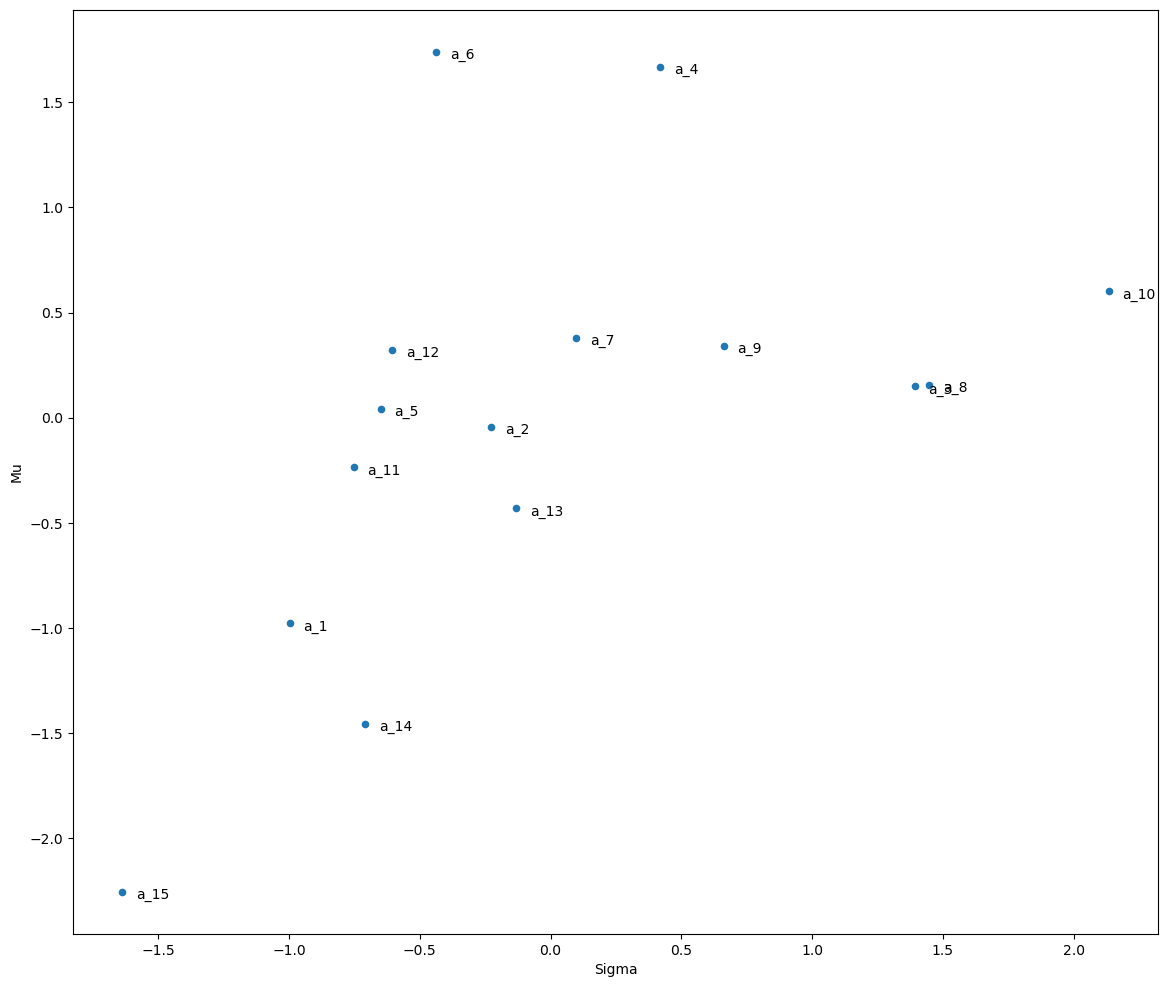

In [ ]:
from matplotlib.pyplot import cm
fig, ax = plt.subplots()
cmap = cm.get_cmap('Spectral')
Sigma_Mu_df_transformed.plot('Sigma', 'Mu', kind='scatter', ax=ax, figsize = (14,12))
for k, v in Sigma_Mu_df_transformed.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=10, color='black')
for k, v in Sigma_Mu_df_transformed.iterrows():
    if (k=='North Korea'):
        plt.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=8, color='red')

Now, get the Pareto-Koopmans frontiers

In [ ]:
df =Sigma_Mu_df.copy()
PKF=[]
count=0
while df.shape[0]>0:
    PKF.append([])
    for idx in df.index:
        comp_df = df.copy()
        comp_df.drop(index = idx)
        if any([any([
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])), # loose in both dimensions
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1])), # loose in first dimension and drow in second
                ((df.loc[idx][0] == comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])) # loose in the second dimension 
                    ]) for i in range (comp_df.shape[0])]
                ) == False:
            PKF[count].append(idx)
    
    if len(PKF[count]) == 0:
        PKF[count].append(df.index)
        break
    else:
        df = df.drop(index=PKF[count])
        print(f'PKF_{str(count+1)}: {PKF[count]}')
        count+=1

PKF_1: ['a_1', 'a_5', 'a_6', 'a_11', 'a_12', 'a_15']
PKF_2: ['a_2', 'a_4', 'a_7', 'a_14']
PKF_3: ['a_9', 'a_10', 'a_13']
PKF_4: ['a_3', 'a_8']


In [ ]:
from PROMETHEE import optimize_PROM1_original_pos_flow

In [ ]:
# Run optimization and get the local efficiences

lambda_ = 0

m = Sigma_Mu_df.shape[0] # number of alternatives
m_f = len(PKF) # number of frontiers
local_ef = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
local_ef_new = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))

for unit in range (m):
    for fr in range (m_f):
        unit_sigmamu = np.array([Sigma_Mu_df.iloc[unit]]) # get the alternative unit
        
        Fr_list = [] # list of alternatives within frontier fr or within a less preferred one
        for k in range(fr, m_f):
            for l in range(len(PKF[k])):
                Fr_list.append(PKF[k][l])
        Fr_sigmamu = np.array (Sigma_Mu_df.loc[Fr_list]) # get alternatives within frontier fr or a less preferred one
        
        
        M, resultado = optimize_PROM1_original_pos_flow(unit_sigmamu, Fr_sigmamu)
        local_ef[unit, fr] = M.obj()

        M_new, resultado_new = optimize_newconstraint(unit_sigmamu, Fr_sigmamu, lambda_)
        local_ef_new[unit, fr] = M_new.obj()
        
        print(f'alternative {unit+1}, fronteira {fr + 1}: resolvido.')

alternative 1, fronteira 1: resolvido.
alternative 1, fronteira 2: resolvido.
alternative 1, fronteira 3: resolvido.
alternative 1, fronteira 4: resolvido.
alternative 2, fronteira 1: resolvido.
alternative 2, fronteira 2: resolvido.
alternative 2, fronteira 3: resolvido.
alternative 2, fronteira 4: resolvido.
alternative 3, fronteira 1: resolvido.
alternative 3, fronteira 2: resolvido.
alternative 3, fronteira 3: resolvido.
alternative 3, fronteira 4: resolvido.
alternative 4, fronteira 1: resolvido.
alternative 4, fronteira 2: resolvido.
alternative 4, fronteira 3: resolvido.
alternative 4, fronteira 4: resolvido.
alternative 5, fronteira 1: resolvido.
alternative 5, fronteira 2: resolvido.
alternative 5, fronteira 3: resolvido.
alternative 5, fronteira 4: resolvido.
alternative 6, fronteira 1: resolvido.
alternative 6, fronteira 2: resolvido.
alternative 6, fronteira 3: resolvido.
alternative 6, fronteira 4: resolvido.
alternative 7, fronteira 1: resolvido.
alternative 7, fronteira 

In [ ]:
# Print local efficiencies

pd.DataFrame(local_ef, columns = ['$PKF_' + str(i) +'$' for i in range(len(PKF))], index=A.index)

,$PKF_0$,$PKF_1$,$PKF_2$,$PKF_3$
$a_1$,-0.008631,0.015018,0.032016,0.088448
$a_2$,-0.025089,0.000000,0.013690,0.059970
$a_3$,-0.077731,-0.050976,-0.023623,0.000000
$a_4$,-0.008082,0.000000,0.120738,0.171019
$a_5$,-0.010009,0.015017,0.027816,0.075579
$a_6$,0.000000,0.029041,0.128819,0.179101
$a_7$,-0.031831,-0.005523,0.016637,0.047867
$a_8$,-0.079543,-0.052732,-0.023901,0.000000
$a_9$,-0.051180,-0.024530,0.000000,0.027019
$a_10$,-0.098181,-0.069826,0.000000,0.050281


Now, lets calculate the global efficience and normalize it using min-max

In [ ]:
global_ef = np.sum(local_ef, axis = 1)
global_ef = (global_ef - global_ef.min()) /(global_ef.max() - global_ef.min())

results = pd.DataFrame({"Global Efficiency": global_ef}, index = Sigma_Mu_df.index)
results = results.assign(Position = results.rank(ascending=False))
results

,Global Efficiency,Position
a_1,0.573931,4.0
a_2,0.415192,9.0
a_3,0.007799,14.0
a_4,0.891945,2.0
a_5,0.536522,6.0
a_6,1.000000,1.0
a_7,0.371753,10.0
a_8,0.000000,15.0
a_9,0.217961,12.0
a_10,0.077969,13.0


# Model 3

In [ ]:
mu_neg = np.mean(Neg_Flows, axis=1)
sigma_neg = np.std(Neg_Flows, axis=1)

#Construindo um DataFrame dos resultados
Sigma_Mu_df = pd.DataFrame({"Sigma": sigma_neg,"Mu": mu_neg}, index= ['a_' + str(i+1) for i in range (m)])
Sigma_Mu_df


,Sigma,Mu
a_1,0.094537,0.306011
a_2,0.089509,0.199464
a_3,0.139086,0.292924
a_4,0.018804,0.036388
a_5,0.029918,0.117048
a_6,0.011760,0.023525
a_7,0.093663,0.162365
a_8,0.114882,0.348657
a_9,0.073538,0.163893
a_10,0.097891,0.266252


Before plotting the results, lets procceed with a standard normalization.

In [ ]:
Sigma_Mu_df_transformed = StandardScaler().fit_transform(Sigma_Mu_df)
Sigma_Mu_df_transformed = pd.DataFrame(Sigma_Mu_df_transformed, columns=['Sigma', 'Mu'], index = ['a_' + str(i+1) for i in range (m)])
Sigma_Mu_df_transformed

,Sigma,Mu
a_1,0.510011,0.226636
a_2,0.386890,-0.265520
a_3,1.600815,0.166186
a_4,-1.344361,-1.018789
a_5,-1.072231,-0.646209
a_6,-1.516818,-1.078204
a_7,0.488618,-0.436883
a_8,1.008168,0.423625
a_9,-0.004166,-0.429824
a_10,0.592139,0.042985


Plot the $\sigma-\mu$ figure 

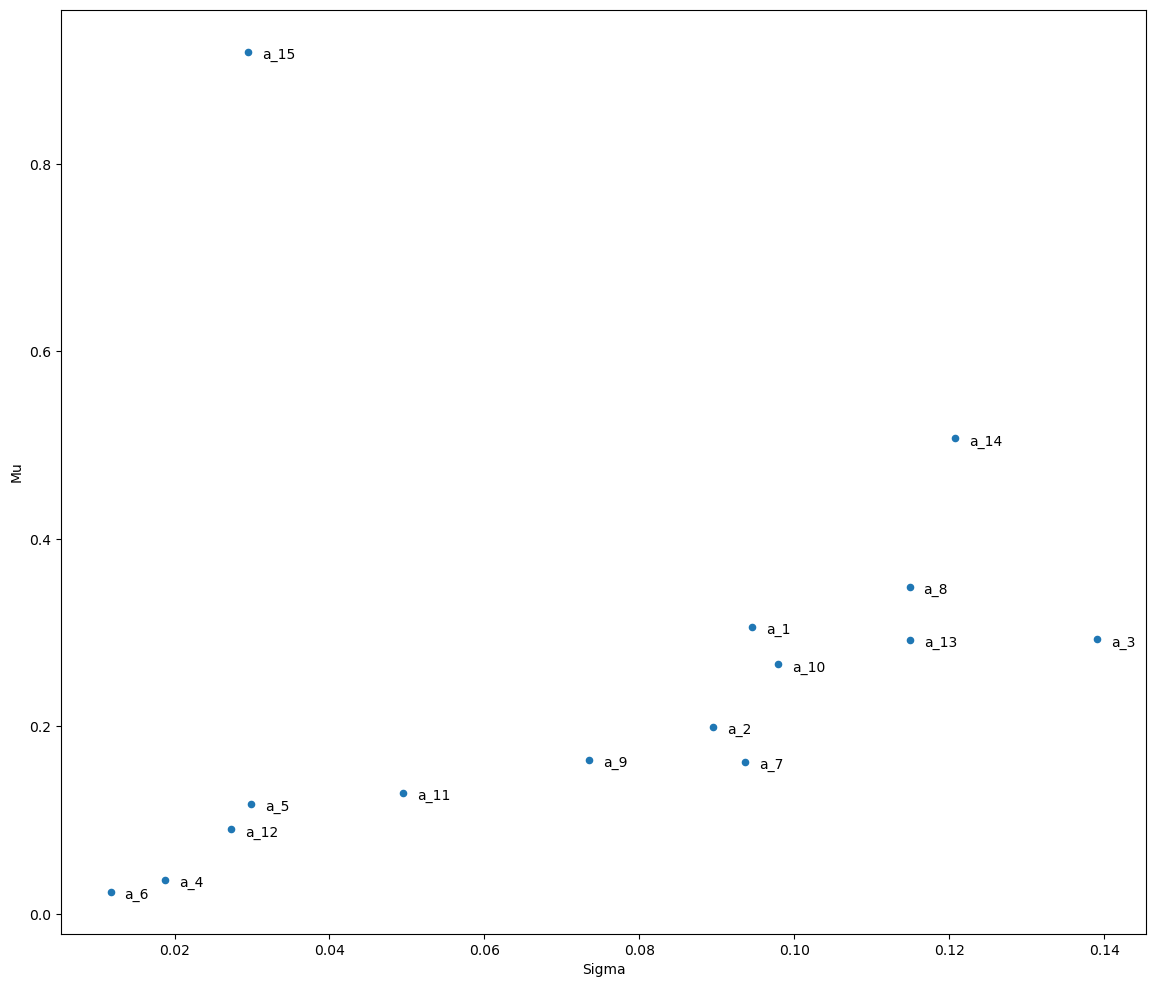

In [ ]:
from matplotlib.pyplot import cm
fig, ax = plt.subplots()
cmap = cm.get_cmap('Spectral')
Sigma_Mu_df.plot('Sigma', 'Mu', kind='scatter', ax=ax, figsize = (14,12))
for k, v in Sigma_Mu_df.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=10, color='black')
for k, v in Sigma_Mu_df.iterrows():
    if (k=='North Korea'):
        plt.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=8, color='red')

Now, get the Pareto-Koopmans frontiers

In [ ]:
df =Sigma_Mu_df.copy()
PKF=[]
count=0
while df.shape[0]>0:
    PKF.append([])
    for idx in df.index:
        comp_df = df.copy()
        comp_df.drop(index = idx)
        if any([any([
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])), # loose in both dimensions
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1])), # loose in first dimension and drow in second
                ((df.loc[idx][0] == comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])) # loose in the second dimension 
                    ]) for i in range (comp_df.shape[0])]
                ) == False:
            PKF[count].append(idx)
    
    if len(PKF[count]) == 0:
        PKF[count].append(df.index)
        break
    else:
        df = df.drop(index=PKF[count])
        print(f'PKF_{str(count+1)}: {PKF[count]}')
        count+=1

PKF_1: ['a_4', 'a_6', 'a_12', 'a_15']
PKF_2: ['a_1', 'a_2', 'a_5', 'a_8', 'a_9', 'a_11', 'a_14']
PKF_3: ['a_3', 'a_7', 'a_10', 'a_13']


In [ ]:
from PROMETHEE import optimize_PROM1_original_neg_flow

In [ ]:
# Run optimization and get the local efficiences
lambda_ = 0
m = Sigma_Mu_df.shape[0] # number of alternatives
m_f = len(PKF) # number of frontiers
local_ef = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
local_ef_new = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))

for unit in range (m):
    for fr in range (m_f):
        unit_sigmamu = np.array([Sigma_Mu_df.iloc[unit]]) # get the alternative unit
        
        Fr_list = [] # list of alternatives within frontier fr or within a less preferred one
        for k in range(fr, m_f):
            for l in range(len(PKF[k])):
                Fr_list.append(PKF[k][l])
        Fr_sigmamu = np.array (Sigma_Mu_df.loc[Fr_list]) # get alternatives within frontier fr or a less preferred one
        
        
        M, resultado = optimize_PROM1_original_neg_flow(unit_sigmamu, Fr_sigmamu)
        local_ef[unit, fr] = M.obj()

        M_new, resultado_new = optimize_newconstraint(unit_sigmamu, Fr_sigmamu, lambda_)
        local_ef_new[unit, fr] = M_new.obj()
        
        print(f'alternative {unit+1}, fronteira {fr + 1}: resolvido.')

alternative 1, fronteira 1: resolvido.
alternative 1, fronteira 2: resolvido.
alternative 1, fronteira 3: resolvido.
alternative 2, fronteira 1: resolvido.
alternative 2, fronteira 2: resolvido.
alternative 2, fronteira 3: resolvido.
alternative 3, fronteira 1: resolvido.
alternative 3, fronteira 2: resolvido.
alternative 3, fronteira 3: resolvido.
alternative 4, fronteira 1: resolvido.
alternative 4, fronteira 2: resolvido.
alternative 4, fronteira 3: resolvido.
alternative 5, fronteira 1: resolvido.
alternative 5, fronteira 2: resolvido.
alternative 5, fronteira 3: resolvido.
alternative 6, fronteira 1: resolvido.
alternative 6, fronteira 2: resolvido.
alternative 6, fronteira 3: resolvido.
alternative 7, fronteira 1: resolvido.
alternative 7, fronteira 2: resolvido.
alternative 7, fronteira 3: resolvido.
alternative 8, fronteira 1: resolvido.
alternative 8, fronteira 2: resolvido.
alternative 8, fronteira 3: resolvido.
alternative 9, fronteira 1: resolvido.
alternative 9, fronteira 

In [ ]:
# Print local efficiencies

pd.DataFrame(local_ef, columns = ['$PKF_' + str(i) +'$' for i in range(len(PKF))], index=A.index)

,$PKF_0$,$PKF_1$,$PKF_2$
$a_1$,-0.075696,-0.016721,0.017812
$a_2$,-0.072831,-0.032768,0.005443
$a_3$,-0.119635,-0.055328,0.000000
$a_4$,-0.006657,0.011114,0.074860
$a_5$,-0.015992,0.000000,0.063746
$a_6$,0.000000,0.018157,0.081903
$a_7$,-0.077624,-0.043145,0.000000
$a_8$,-0.094820,-0.025168,0.055733
$a_9$,-0.057859,-0.026533,0.020126
$a_10$,-0.079756,-0.026952,0.000000


Now, lets calculate the global efficience and normalize it using min-max

In [ ]:
global_ef = np.sum(local_ef, axis = 1)
global_ef = (global_ef - global_ef.min()) /(global_ef.max() - global_ef.min())

results = pd.DataFrame({"Global Efficiency": global_ef}, index = Sigma_Mu_df.index)
results = results.assign(Position = results.rank(ascending=True))
results

,Global Efficiency,Position
a_1,0.082680,6.0
a_2,0.061630,5.0
a_3,0.000000,1.0
a_4,0.209489,12.0
a_5,0.183486,10.0
a_6,0.226579,13.0
a_7,0.044647,3.0
a_8,0.091207,8.0
a_9,0.091198,7.0
a_10,0.056232,4.0


# Model 4

In [ ]:

mu_pos = np.mean(Pos_Flows, axis=1)
sigma_pos = np.std(Pos_Flows, axis=1)

mu_neg = np.mean(Neg_Flows, axis=1)
sigma_neg = np.std(Neg_Flows, axis=1)

#Construindo um DataFrame dos resultados
Sigma_Mu_df = pd.DataFrame({"Sigma_pos": sigma_pos,"Mu_pos": mu_pos, "Sigma_neg": sigma_neg,"Mu_neg": mu_neg}, index= ['a_' + str(i+1) for i in range (m)])
Sigma_Mu_df


,Sigma_pos,Mu_pos,Sigma_neg,Mu_neg
a_1,0.026499,0.146507,0.094537,0.306011
a_2,0.054977,0.252042,0.089509,0.199464
a_3,0.114947,0.273779,0.139086,0.292924
a_4,0.078903,0.445471,0.018804,0.036388
a_5,0.039368,0.261763,0.029918,0.117048
a_6,0.047269,0.453552,0.011760,0.023525
a_7,0.067079,0.299709,0.093663,0.162365
a_8,0.117003,0.274452,0.114882,0.348657
a_9,0.087928,0.295586,0.073538,0.163893
a_10,0.142432,0.324733,0.097891,0.266252


Before plotting the results, lets procceed with a standard normalization.

In [ ]:
Sigma_Mu_df_transformed = StandardScaler().fit_transform(Sigma_Mu_df)
Sigma_Mu_df_transformed = pd.DataFrame(Sigma_Mu_df_transformed, columns=['Sigma_pos', 'Mu_pos', 'Sigma_neg', 'Mu_neg'], index = ['a_' + str(i+1) for i in range (m)])
Sigma_Mu_df_transformed

,Sigma_pos,Mu_pos,Sigma_neg,Mu_neg
a_1,-0.997217,-0.978071,0.510011,0.226636
a_2,-0.228149,-0.043437,0.386890,-0.265520
a_3,1.391414,0.149078,1.600815,0.166186
a_4,0.418002,1.669609,-1.344361,-1.018789
a_5,-0.649675,0.042656,-1.072231,-0.646209
a_6,-0.436311,1.741181,-1.516818,-1.078204
a_7,0.098700,0.378715,0.488618,-0.436883
a_8,1.446944,0.155030,1.008168,0.423625
a_9,0.661729,0.342199,-0.004166,-0.429824
a_10,2.133675,0.600331,0.592139,0.042985


Now, get the Pareto-Koopmans frontiers

In [ ]:
df =Sigma_Mu_df.copy()
PKF=[]
count=0
while df.shape[0]>0:
    PKF.append([])
    for idx in df.index:
        comp_df = df.copy()
        comp_df.drop(index = idx)
        if any([any([
                # loose dimension 0
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1]) and (df.loc[idx][2] == comp_df.iloc[i,2]) and (df.loc[idx][3] == comp_df.iloc[i,3])),
                # loose dimension 1
                ((df.loc[idx][0] == comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1]) and (df.loc[idx][2] == comp_df.iloc[i,2]) and (df.loc[idx][3] == comp_df.iloc[i,3])),
                # loose dimension 2
                ((df.loc[idx][0] == comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1]) and (df.loc[idx][2] > comp_df.iloc[i,2]) and (df.loc[idx][3] == comp_df.iloc[i,3])),
                # loose dimension 3
                ((df.loc[idx][0] == comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1]) and (df.loc[idx][2] == comp_df.iloc[i,2]) and (df.loc[idx][3] < comp_df.iloc[i,3])),
                # loose dimension 0 and 1
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1]) and (df.loc[idx][2] == comp_df.iloc[i,2]) and (df.loc[idx][3] == comp_df.iloc[i,3])),
                # loose dimension 0 and 2
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1]) and (df.loc[idx][2] > comp_df.iloc[i,2]) and (df.loc[idx][3] == comp_df.iloc[i,3])),
                # loose dimension 0 and 3
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1]) and (df.loc[idx][2] == comp_df.iloc[i,2]) and (df.loc[idx][3] < comp_df.iloc[i,3])),
                # loose dimension 1 and 2
                # loose dimension 1 and 3
                # loose dimension 2 and 3
                # loose dimension 0, 1 and 2
                # loose dimension 0, 1 and 3
                # loose dimension 0, 2 and 3
                # loose dimension 1, 2 and 3
                # loose dimension 0, 1, 2 and 3

                ]) for i in range (comp_df.shape[0])]
                ) == False:
            PKF[count].append(idx)
    
    if len(PKF[count]) == 0:
        PKF[count].append(df.index)
        print('deu falso')
        break
    else:
        df = df.drop(index=PKF[count])
        print(f'PKF_{str(count+1)}: {PKF[count]}')
        count+=1

PKF_1: ['a_1', 'a_2', 'a_3', 'a_4', 'a_5', 'a_6', 'a_7', 'a_8', 'a_9', 'a_10', 'a_11', 'a_12', 'a_13', 'a_14', 'a_15']


In [ ]:
PKF

[['a_1',
  'a_2',
  'a_3',
  'a_4',
  'a_5',
  'a_6',
  'a_7',
  'a_8',
  'a_9',
  'a_10',
  'a_11',
  'a_12',
  'a_13',
  'a_14',
  'a_15']]

In [ ]:
from PROMETHEE import optimize_PROM1_original_pos_flow

In [ ]:
# Run optimization and get the local efficiences
lambda_=0
m = Sigma_Mu_df.shape[0] # number of alternatives
m_f = len(PKF) # number of frontiers
local_ef = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
local_ef_new = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))

for unit in range (m):
    for fr in range (m_f):
        unit_sigmamu = np.array([Sigma_Mu_df.iloc[unit]]) # get the alternative unit
        
        Fr_list = [] # list of alternatives within frontier fr or within a less preferred one
        for k in range(fr, m_f):
            for l in range(len(PKF[k])):
                Fr_list.append(PKF[k][l])
        Fr_sigmamu = np.array (Sigma_Mu_df.loc[Fr_list]) # get alternatives within frontier fr or a less preferred one
        
        
        M, resultado = optimize_PROM1_original_pos_flow(unit_sigmamu, Fr_sigmamu)
        local_ef[unit, fr] = M.obj()

        M_new, resultado_new = optimize_newconstraint(unit_sigmamu, Fr_sigmamu, lambda_)
        local_ef_new[unit, fr] = M_new.obj()
        
        print(f'alternative {unit+1}, fronteira {fr + 1}: resolvido.')

alternative 1, fronteira 1: resolvido.
alternative 2, fronteira 1: resolvido.
alternative 3, fronteira 1: resolvido.
alternative 4, fronteira 1: resolvido.
alternative 5, fronteira 1: resolvido.
alternative 6, fronteira 1: resolvido.
alternative 7, fronteira 1: resolvido.
alternative 8, fronteira 1: resolvido.
alternative 9, fronteira 1: resolvido.
alternative 10, fronteira 1: resolvido.
alternative 11, fronteira 1: resolvido.
alternative 12, fronteira 1: resolvido.
alternative 13, fronteira 1: resolvido.
alternative 14, fronteira 1: resolvido.
alternative 15, fronteira 1: resolvido.


In [ ]:
# Print local efficiencies

pd.DataFrame(local_ef, columns = ['$PKF_' + str(i) +'$' for i in range(len(PKF))], index=A.index)

,$PKF_0$
$a_1$,-0.008631
$a_2$,-0.025089
$a_3$,-0.077731
$a_4$,-0.008082
$a_5$,-0.010009
$a_6$,0.000000
$a_7$,-0.031831
$a_8$,-0.079543
$a_9$,-0.051180
$a_10$,-0.098181


Now, lets calculate the global efficience and normalize it using min-max

In [ ]:
global_ef = np.sum(local_ef, axis = 1)
global_ef = (global_ef - global_ef.min()) /(global_ef.max() - global_ef.min())

results = pd.DataFrame({"Global Efficiency": global_ef}, index = Sigma_Mu_df.index)
results = results.assign(Position = results.rank(ascending=False))
results

,Global Efficiency,Position
a_1,0.912096,5.0
a_2,0.744461,9.0
a_3,0.208289,13.0
a_4,0.917688,3.0
a_5,0.898060,7.0
a_6,1.000000,1.5
a_7,0.675790,10.0
a_8,0.189839,14.0
a_9,0.478724,12.0
a_10,0.000000,15.0


# Modified Model 1

In [ ]:
mu_net = np.mean(Net_Flows, axis=1)
sigma_net = np.std(Net_Flows, axis=1)

#Construindo um DataFrame dos resultados
Sigma_Mu_df = pd.DataFrame({"Sigma": sigma_net,"Mu": mu_net}, index= ['a_' + str(i+1) for i in range (m)])
Sigma_Mu_df


,Sigma,Mu
a_1,0.115844,-0.159504
a_2,0.140416,0.052578
a_3,0.232233,-0.019144
a_4,0.091467,0.409083
a_5,0.064601,0.144715
a_6,0.045220,0.430027
a_7,0.151465,0.137344
a_8,0.218265,-0.074205
a_9,0.150976,0.131692
a_10,0.223447,0.058481


In [ ]:
Sigma_Mu_df_transformed = StandardScaler().fit_transform(Sigma_Mu_df)
Sigma_Mu_df_transformed = pd.DataFrame(Sigma_Mu_df_transformed, columns=['Sigma', 'Mu'], index = ['a_' + str(i+1) for i in range (m)])
Sigma_Mu_df_transformed

,Sigma,Mu
a_1,-0.203437,-0.501234
a_2,0.185417,0.165224
a_3,1.638384,-0.060161
a_4,-0.589193,1.285527
a_5,-1.014339,0.454761
a_6,-1.321040,1.351344
a_7,0.360261,0.431598
a_8,1.417348,-0.233188
a_9,0.352513,0.413838
a_10,1.499359,0.183774


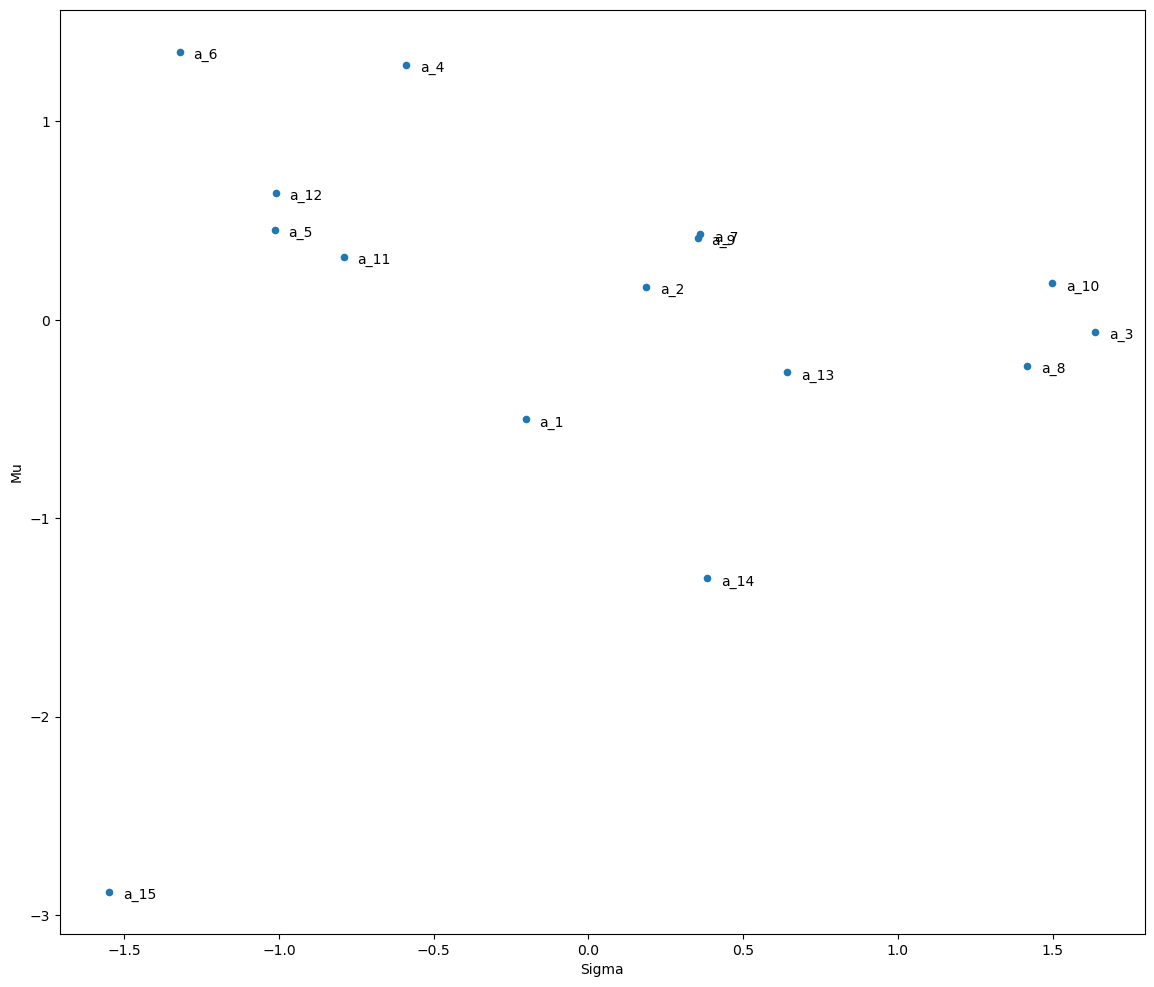

In [ ]:
from matplotlib.pyplot import cm
fig, ax = plt.subplots()
cmap = cm.get_cmap('Spectral')
Sigma_Mu_df_transformed.plot('Sigma', 'Mu', kind='scatter', ax=ax, figsize = (14,12))
for k, v in Sigma_Mu_df_transformed.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=10, color='black')
for k, v in Sigma_Mu_df_transformed.iterrows():
    if (k=='North Korea'):
        plt.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=8, color='red')

Now, the rule for getting PKFs is changed

In [ ]:
df =Sigma_Mu_df.copy()
PKF=[]
count=0
while df.shape[0]>0:
    PKF.append([])
    for idx in df.index:
        comp_df = df.copy()
        comp_df.drop(index = idx)
        if any([any([
                ((df.loc[idx][0] < comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])), # loose in both dimensions
                ((df.loc[idx][0] < comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1])), # loose in first dimension and drow in second
                ((df.loc[idx][0] == comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])) # loose in the second dimension 
                    ]) for i in range (comp_df.shape[0])]
                ) == False:
            PKF[count].append(idx)
    
    if len(PKF[count]) == 0:
        PKF[count].append(df.index)
        break
    else:
        df = df.drop(index=PKF[count])
        print(f'PKF_{str(count+1)}: {PKF[count]}')
        count+=1

PKF_1: ['a_3', 'a_4', 'a_6', 'a_7', 'a_10']
PKF_2: ['a_8', 'a_9', 'a_12']
PKF_3: ['a_2', 'a_5', 'a_11', 'a_13']
PKF_4: ['a_1', 'a_14']
PKF_5: ['a_15']


In [ ]:
lambda_ = 0
m = Sigma_Mu_df.shape[0] # number of alternatives
m_f = len(PKF) # number of frontiers
local_ef = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
local_ef_new = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))

for unit in range (m):
    for fr in range (m_f):
        unit_sigmamu = np.array([Sigma_Mu_df.iloc[unit]]) # get the alternative unit
        
        Fr_list = [] # list of alternatives within frontier fr or within a less preferred one
        for k in range(fr, m_f):
            for l in range(len(PKF[k])):
                Fr_list.append(PKF[k][l])
        Fr_sigmamu = np.array (Sigma_Mu_df.loc[Fr_list]) # get alternatives within frontier fr or a less preferred one
        
        
        M, resultado = optimize_PROM2_original_positive_beta(unit_sigmamu, Fr_sigmamu)
        local_ef[unit, fr] = M.obj()

        M_new, resultado_new = optimize_newconstraint(unit_sigmamu, Fr_sigmamu, lambda_)
        local_ef_new[unit, fr] = M_new.obj()
        
        print(f'alternative {unit+1}, fronteira {fr + 1}: resolvido.')

alternative 1, fronteira 1: resolvido.
alternative 1, fronteira 2: resolvido.
alternative 1, fronteira 3: resolvido.
alternative 1, fronteira 4: resolvido.
alternative 1, fronteira 5: resolvido.
alternative 2, fronteira 1: resolvido.
alternative 2, fronteira 2: resolvido.
alternative 2, fronteira 3: resolvido.
alternative 2, fronteira 4: resolvido.
alternative 2, fronteira 5: resolvido.
alternative 3, fronteira 1: resolvido.
alternative 3, fronteira 2: resolvido.
alternative 3, fronteira 3: resolvido.
alternative 3, fronteira 4: resolvido.
alternative 3, fronteira 5: resolvido.
alternative 4, fronteira 1: resolvido.
alternative 4, fronteira 2: resolvido.
alternative 4, fronteira 3: resolvido.
alternative 4, fronteira 4: resolvido.
alternative 4, fronteira 5: resolvido.
alternative 5, fronteira 1: resolvido.
alternative 5, fronteira 2: resolvido.
alternative 5, fronteira 3: resolvido.
alternative 5, fronteira 4: resolvido.
alternative 5, fronteira 5: resolvido.
alternative 6, fronteira 

In [ ]:
global_ef = np.sum(local_ef, axis = 1)
global_ef = (global_ef - global_ef.min()) /(global_ef.max() - global_ef.min())
results = pd.DataFrame({"Global Efficiency": global_ef}, index = Sigma_Mu_df.index)
results = results.assign(Position = results.rank(ascending=False))
results

,Global Efficiency,Position
a_1,0.367694,13.0
a_2,0.562250,10.0
a_3,0.573000,8.0
a_4,0.972961,2.0
a_5,0.610581,7.0
a_6,1.000000,1.0
a_7,0.651271,4.0
a_8,0.525387,11.0
a_9,0.645032,5.0
a_10,0.629172,6.0


Alternativa $a_3$ agora está na oitava posição ao invés da posição 14.

Vamos ver o comportamento dessa alternativa.

In [ ]:
Net_Flows.shape

(15, 10000)

In [ ]:
Net_Flows_df = pd.DataFrame(Net_Flows, columns = [s for s in range(n_simulations)], index = A.index)
Net_Flows_df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
$a_1$,-0.111763,-0.155282,-0.019669,-0.321369,-0.259554,-0.013681,-0.015923,-0.119339,-0.273262,-0.142858,...,-0.044604,-0.126222,-0.123458,-0.349644,-0.165314,-0.054075,-0.146178,-0.054210,-0.018277,-0.187922
$a_2$,0.128615,-0.103302,0.220679,-0.006482,0.206449,0.082619,0.058749,-0.126272,0.208634,0.116770,...,-0.031886,-0.032653,0.005829,0.306588,0.013684,0.114372,0.087804,-0.015959,0.049797,0.003533
$a_3$,-0.023815,0.302312,-0.067580,-0.305948,0.141166,0.017694,-0.081058,0.283149,-0.021586,-0.080074,...,0.162487,0.214754,-0.155712,0.194668,0.015838,0.226825,0.134061,0.182516,0.108667,-0.283763
$a_4$,0.396806,0.292122,0.389287,0.530146,0.455438,0.323845,0.328605,0.325444,0.492110,0.406388,...,0.379547,0.333619,0.285237,0.528958,0.314921,0.331224,0.401743,0.366784,0.319702,0.388662
$a_5$,0.186290,0.044448,0.234615,0.114748,0.149177,0.170811,0.162094,0.104576,0.167441,0.159507,...,0.180514,0.106821,0.046273,0.177682,0.075199,0.189531,0.174062,0.185689,0.173961,0.075761
$a_6$,0.400968,0.397654,0.422449,0.494794,0.428705,0.416494,0.410727,0.354860,0.460847,0.413372,...,0.374292,0.414364,0.456985,0.454958,0.413890,0.366974,0.397909,0.374236,0.379878,0.486023
$a_7$,0.050951,0.312024,-0.109537,0.182736,0.387178,-0.034950,-0.073204,0.191044,0.309758,0.122940,...,-0.053791,0.235900,0.141211,0.514216,0.247055,0.053196,0.140110,0.021839,-0.028424,0.153047
$a_8$,-0.145274,0.216842,-0.098541,-0.209817,-0.209318,0.092536,0.069454,0.008948,-0.228655,-0.108399,...,-0.120268,0.106025,0.394948,-0.365923,0.182643,-0.047178,-0.147239,-0.120386,0.048116,0.156538
$a_9$,0.080243,0.273663,-0.059470,0.142891,0.442209,-0.041790,-0.094983,0.183520,0.348106,0.124212,...,-0.027910,0.198104,0.060676,0.610908,0.196477,0.114554,0.182073,0.036364,-0.002783,0.066149
$a_10$,-0.013245,0.158571,-0.032259,0.175603,-0.217555,0.145476,0.226888,-0.006149,-0.109819,0.069725,...,-0.095633,0.093701,0.612263,-0.393569,0.332926,-0.159410,-0.141478,-0.112787,0.038942,0.472602


In [ ]:
Net_Flows_rank = Net_Flows_df.rank(ascending=False)
Net_Flows_rank

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
$a_1$,12.0,12.0,8.0,14.0,12.0,11.0,10.0,11.0,13.0,13.0,...,9.0,12.0,12.0,10.0,12.0,11.0,12.0,10.0,11.0,12.0
$a_2$,5.0,11.0,5.0,9.0,5.0,7.0,9.0,12.0,5.0,7.0,...,8.0,11.0,9.0,5.0,10.0,7.0,9.0,9.0,7.0,10.0
$a_3$,11.0,3.0,11.0,13.0,8.0,10.0,12.0,3.0,9.0,11.0,...,6.0,4.0,13.0,6.0,9.0,4.0,7.0,6.0,5.0,13.0
$a_4$,2.0,4.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,...,1.0,2.0,4.0,2.0,3.0,2.0,1.0,2.0,2.0,3.0
$a_5$,4.0,10.0,4.0,8.0,7.0,4.0,5.0,8.0,7.0,4.0,...,5.0,7.0,7.0,7.0,8.0,5.0,5.0,5.0,4.0,7.0
$a_6$,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0,...,2.0,1.0,2.0,4.0,1.0,1.0,2.0,1.0,1.0,1.0
$a_7$,8.0,2.0,13.0,4.0,4.0,12.0,11.0,6.0,4.0,6.0,...,10.0,3.0,5.0,3.0,4.0,9.0,6.0,8.0,12.0,5.0
$a_8$,13.0,6.0,12.0,11.0,10.0,6.0,8.0,9.0,12.0,12.0,...,13.0,8.0,3.0,12.0,6.0,10.0,13.0,12.0,8.0,4.0
$a_9$,7.0,5.0,10.0,7.0,2.0,13.0,13.0,7.0,3.0,5.0,...,7.0,5.0,6.0,1.0,5.0,6.0,4.0,7.0,10.0,8.0
$a_10$,10.0,7.0,9.0,5.0,11.0,5.0,3.0,10.0,10.0,9.0,...,12.0,9.0,1.0,13.0,2.0,13.0,10.0,11.0,9.0,2.0


In [ ]:
# Porcentagem de vezes que a_3 vence a_2

count = 0
for j in range (n_simulations):
    if Net_Flows_rank.loc['$a_3$'][j] < Net_Flows_rank.loc['$a_2$'][j]:
        count += 1

count/n_simulations

0.3588

In [ ]:
# Mode over alternative positions
Net_Flows_rank.mode(axis = 1)

,0
$a_1$,12.0
$a_2$,5.0
$a_3$,13.0
$a_4$,2.0
$a_5$,7.0
$a_6$,1.0
$a_7$,4.0
$a_8$,11.0
$a_9$,3.0
$a_10$,10.0


In [ ]:
Net_Flows_rank_counts = Net_Flows_rank.apply(pd.Series.value_counts, axis = 1).fillna(0)
Net_Flows_rank_counts

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0
$a_1$,0.0,0.0,0.0,0.0,0.0,0.0,114.0,445.0,497.0,618.0,2140.0,3460.0,2474.0,252.0,0.0
$a_2$,0.0,0.0,258.0,251.0,1607.0,1005.0,916.0,1134.0,1503.0,901.0,1173.0,1110.0,142.0,0.0,0.0
$a_3$,448.0,190.0,309.0,386.0,607.0,621.0,456.0,941.0,1136.0,968.0,846.0,979.0,1435.0,678.0,0.0
$a_4$,3804.0,4286.0,1116.0,643.0,106.0,24.0,16.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$a_5$,0.0,3.0,23.0,2170.0,1270.0,1793.0,2233.0,1480.0,491.0,537.0,0.0,0.0,0.0,0.0,0.0
$a_6$,4996.0,4650.0,279.0,74.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$a_7$,0.0,49.0,1379.0,2292.0,1232.0,744.0,983.0,730.0,953.0,462.0,460.0,346.0,309.0,61.0,0.0
$a_8$,4.0,127.0,441.0,608.0,320.0,361.0,339.0,453.0,734.0,1304.0,1622.0,1331.0,1268.0,1088.0,0.0
$a_9$,148.0,106.0,1423.0,1322.0,875.0,1075.0,1017.0,1265.0,834.0,954.0,390.0,375.0,216.0,0.0,0.0
$a_10$,532.0,501.0,1213.0,317.0,432.0,387.0,429.0,854.0,1070.0,1633.0,1008.0,730.0,792.0,102.0,0.0


In [ ]:
Net_Flows_rank_probs = Net_Flows_rank_counts/n_simulations
Net_Flows_rank_probs

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0
$a_1$,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0114,0.0445,0.0497,0.0618,0.2140,0.3460,0.2474,0.0252,0.0
$a_2$,0.0000,0.0000,0.0258,0.0251,0.1607,0.1005,0.0916,0.1134,0.1503,0.0901,0.1173,0.1110,0.0142,0.0000,0.0
$a_3$,0.0448,0.0190,0.0309,0.0386,0.0607,0.0621,0.0456,0.0941,0.1136,0.0968,0.0846,0.0979,0.1435,0.0678,0.0
$a_4$,0.3804,0.4286,0.1116,0.0643,0.0106,0.0024,0.0016,0.0005,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
$a_5$,0.0000,0.0003,0.0023,0.2170,0.1270,0.1793,0.2233,0.1480,0.0491,0.0537,0.0000,0.0000,0.0000,0.0000,0.0
$a_6$,0.4996,0.4650,0.0279,0.0074,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
$a_7$,0.0000,0.0049,0.1379,0.2292,0.1232,0.0744,0.0983,0.0730,0.0953,0.0462,0.0460,0.0346,0.0309,0.0061,0.0
$a_8$,0.0004,0.0127,0.0441,0.0608,0.0320,0.0361,0.0339,0.0453,0.0734,0.1304,0.1622,0.1331,0.1268,0.1088,0.0
$a_9$,0.0148,0.0106,0.1423,0.1322,0.0875,0.1075,0.1017,0.1265,0.0834,0.0954,0.0390,0.0375,0.0216,0.0000,0.0
$a_10$,0.0532,0.0501,0.1213,0.0317,0.0432,0.0387,0.0429,0.0854,0.1070,0.1633,0.1008,0.0730,0.0792,0.0102,0.0


In [ ]:
pd.DataFrame(Net_Flows_rank_probs.max(axis=1))

,0
$a_1$,0.3460
$a_2$,0.1607
$a_3$,0.1435
$a_4$,0.4286
$a_5$,0.2233
$a_6$,0.4996
$a_7$,0.2292
$a_8$,0.1622
$a_9$,0.1423
$a_10$,0.1633


In [ ]:
SumProduct_rank_probs = Net_Flows_rank_probs * [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
Net_Flows_expected_rank = SumProduct_rank_probs.sum(axis = 1)
pd.DataFrame(Net_Flows_expected_rank)

,0
$a_1$,11.5761
$a_2$,8.1933
$a_3$,8.9885
$a_4$,1.9122
$a_5$,6.3123
$a_6$,1.5434
$a_7$,6.4028
$a_8$,9.8952
$a_9$,6.6625
$a_10$,7.8290
